# Explore here

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import joblib
import pickle
import os


# Cargar datos

In [80]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Análisis exploratorio de datos

In [81]:
# Revisión de columnas y la identificación de nulos
print(f'Este dataframe contiene {df.shape[0]} y {df.shape[1]} columnas')
df.describe()
df.isnull().sum()

Este dataframe contiene 768 y 9 columnas


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Este dataframe muestra variables que tienen valores cero. Lo que no tiene sentido teniendo en cuenta que se trata de datos registrando medidas de pacientes. Por ejemplo, BloodPressure, no puede ser 0 (independientemente de que sea un paciente sano o enfermo).

In [82]:
columnas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columnas:
    print(f"{col} tiene {(df[col] == 0).sum()} valores con cero")

Glucose tiene 5 valores con cero
BloodPressure tiene 35 valores con cero
SkinThickness tiene 227 valores con cero
Insulin tiene 374 valores con cero
BMI tiene 11 valores con cero


Dados los resultados, existe un número significativo de valores que deberíamos tratar (especialmente 'SkinThickness' y 'Insulin').

In [83]:
# Reemplazamos ceros por NaN para poder imputarlos más facilmente
columnas_a_corregir = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columnas_a_corregir] = df[columnas_a_corregir].replace(0, np.nan)

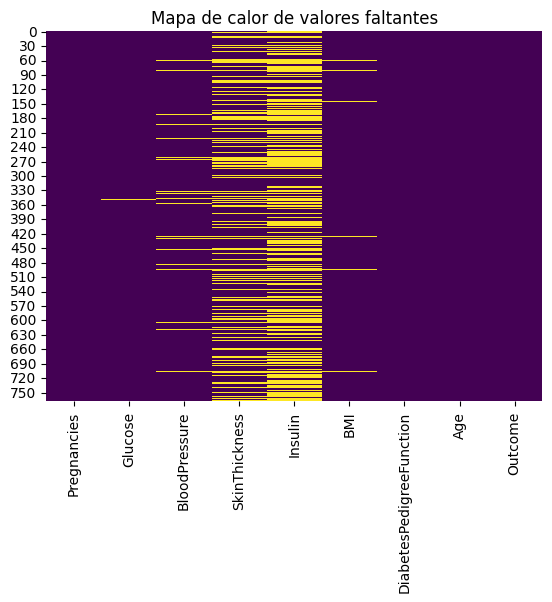

In [84]:
# Visualizamos los valores faltantes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de calor de valores faltantes")
plt.show()

In [85]:
# Definir el imputador con k vecinos (por ejemplo, k=3)
imputador_knn = KNNImputer(n_neighbors=5)

# Aplicar imputación
df_imputado = imputador_knn.fit_transform(df)

# Volver a convertir a DataFrame, ya que fit_transform devuelve un array numpy
df = pd.DataFrame(df_imputado, columns=df.columns)

/tmp/ipykernel_518/3459231447.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 0], x=columna, label='No Diabetes', shade=True, color='#66c2a5')
/tmp/ipykernel_518/3459231447.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 1], x=columna, label='Diabetes', shade=True, color='#fc8d62')


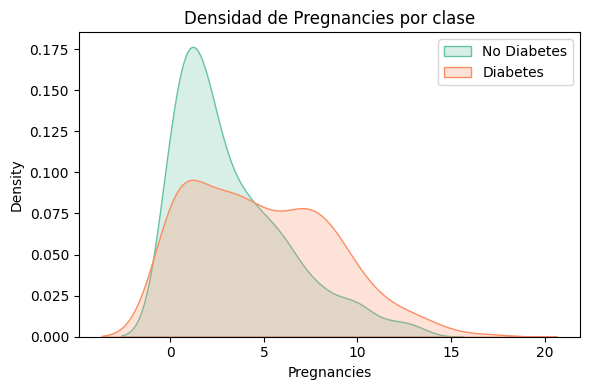

/tmp/ipykernel_518/3459231447.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 0], x=columna, label='No Diabetes', shade=True, color='#66c2a5')
/tmp/ipykernel_518/3459231447.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 1], x=columna, label='Diabetes', shade=True, color='#fc8d62')


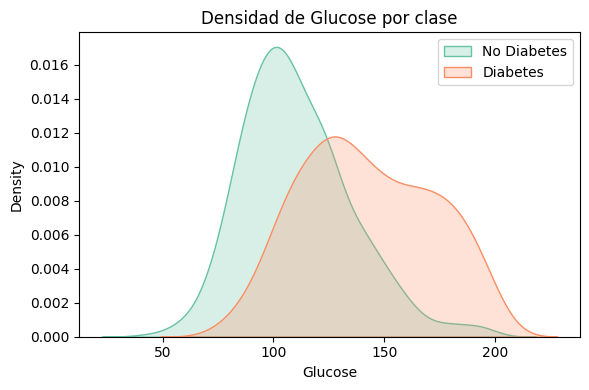

/tmp/ipykernel_518/3459231447.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 0], x=columna, label='No Diabetes', shade=True, color='#66c2a5')
/tmp/ipykernel_518/3459231447.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 1], x=columna, label='Diabetes', shade=True, color='#fc8d62')


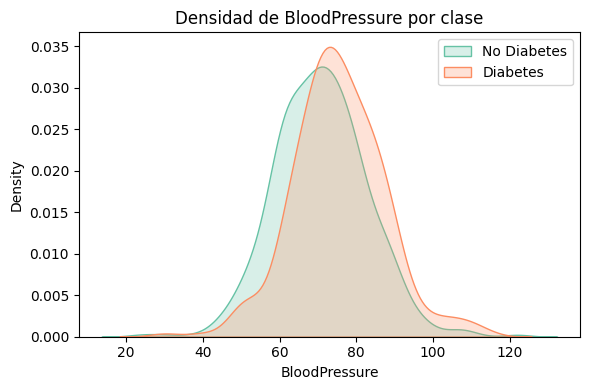

/tmp/ipykernel_518/3459231447.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 0], x=columna, label='No Diabetes', shade=True, color='#66c2a5')
/tmp/ipykernel_518/3459231447.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 1], x=columna, label='Diabetes', shade=True, color='#fc8d62')


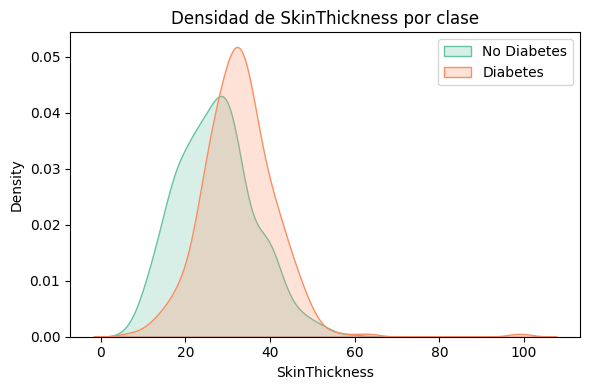

/tmp/ipykernel_518/3459231447.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 0], x=columna, label='No Diabetes', shade=True, color='#66c2a5')
/tmp/ipykernel_518/3459231447.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 1], x=columna, label='Diabetes', shade=True, color='#fc8d62')


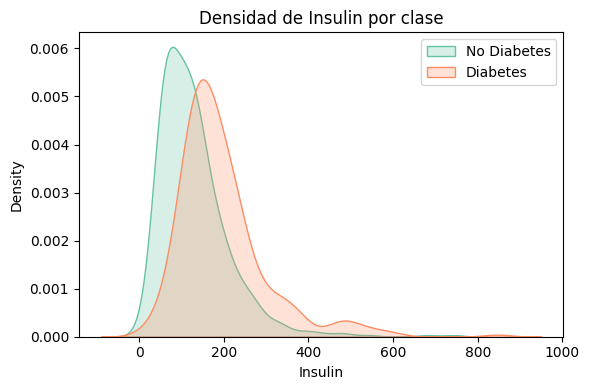

/tmp/ipykernel_518/3459231447.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 0], x=columna, label='No Diabetes', shade=True, color='#66c2a5')
/tmp/ipykernel_518/3459231447.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 1], x=columna, label='Diabetes', shade=True, color='#fc8d62')


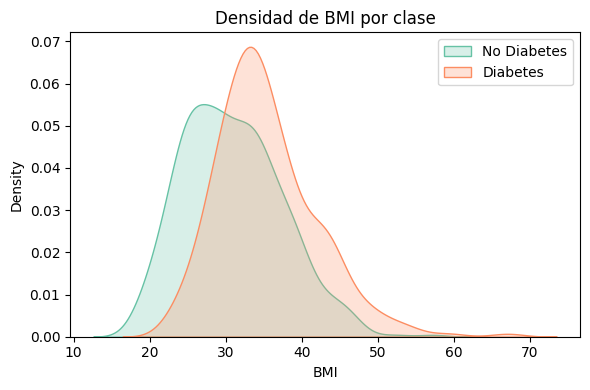

/tmp/ipykernel_518/3459231447.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 0], x=columna, label='No Diabetes', shade=True, color='#66c2a5')
/tmp/ipykernel_518/3459231447.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 1], x=columna, label='Diabetes', shade=True, color='#fc8d62')


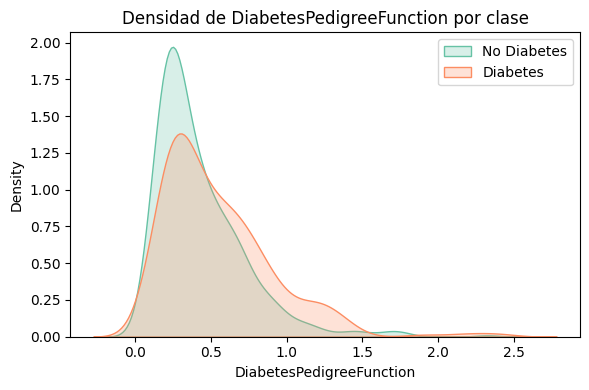

/tmp/ipykernel_518/3459231447.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 0], x=columna, label='No Diabetes', shade=True, color='#66c2a5')
/tmp/ipykernel_518/3459231447.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 1], x=columna, label='Diabetes', shade=True, color='#fc8d62')


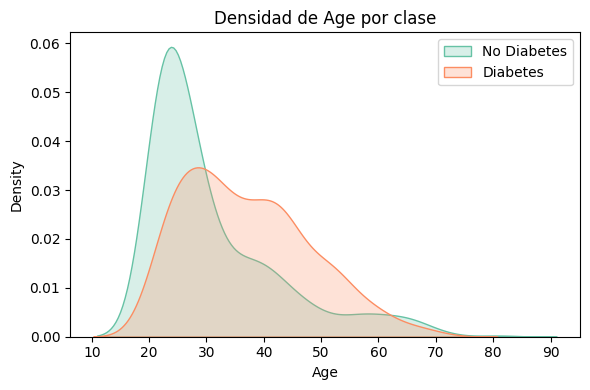

In [86]:
todas_las_columnas = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for columna in todas_las_columnas:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df[df['Outcome'] == 0], x=columna, label='No Diabetes', shade=True, color='#66c2a5')
    sns.kdeplot(data=df[df['Outcome'] == 1], x=columna, label='Diabetes', shade=True, color='#fc8d62')
    plt.title(f'Densidad de {columna} por clase')
    plt.xlabel(columna)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [87]:
# Distribución de la bariable objetivo
print(df['Outcome'].value_counts(normalize=True))

Outcome
0.0    0.651042
1.0    0.348958
Name: proportion, dtype: float64


El conjunto está moderadamente desbalanceado. Cerca del 65% de los registros son de personas sin diabetes y sólo el 35% son los casos positivos. Como hemos visto en ejercicios anteriores, ésto puede llevar a que el modelo no tenga un buen desempeño en la identificación de los casos positivos.
Por lo tanto, trabajaremos este balanceo de clases ponderando clases directamente en el modelo de sklearn DecisionTreeClassifier. Para ello, incluiremos más adelante un parámetro class_weight='balanced', que ajusta automáticamente el peso de cada clase según su frecuencia

In [88]:
# Selección X e y
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [89]:
# Divsión entre grupo de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify=y asegura que la proporción de clases se mantenga similar en ambos subconjuntos

# Entrenar árbol de decisión

In [90]:
# Árbol de decisión simple
arbol_simple = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',
    random_state=42
)

arbol_simple.fit(X_train, y_train)
y_pred_simple = arbol_simple.predict(X_test)

In [91]:
# Árbol de decisión complejo
arbol_complejo = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)

arbol_complejo.fit(X_train, y_train)
y_pred_complejo = arbol_complejo.predict(X_test)

In [92]:
# Comparar ambas métricas
print('Árbol Simple:\n')
print(classification_report(y_test, y_pred_simple))

print('\n🌳 Árbol Complejo:\n')
print(classification_report(y_test, y_pred_complejo))

Árbol Simple:

              precision    recall  f1-score   support

         0.0       0.86      0.64      0.74       100
         1.0       0.55      0.81      0.66        54

    accuracy                           0.70       154
   macro avg       0.71      0.73      0.70       154
weighted avg       0.75      0.70      0.71       154


🌳 Árbol Complejo:

              precision    recall  f1-score   support

         0.0       0.73      0.78      0.75       100
         1.0       0.53      0.46      0.50        54

    accuracy                           0.67       154
   macro avg       0.63      0.62      0.62       154
weighted avg       0.66      0.67      0.66       154



El árbol simple tiene mejor recall para la clase 1 (0,81). Lo que isgnifica que detecta más casos positivos (personas con diabetes). Sin embargo, pierde precisión.
Por su parte, el árbol complejo cuenta con un mejor desempeño sobre la clase 0 pero pierde fuerza en la detección de casos positivos (0,46)

En este caso, considero que sería mejor priorizar la detección de diabetes minimizando los falsos negativos. Para ello, el árbol simple sería una mejor alternativa.

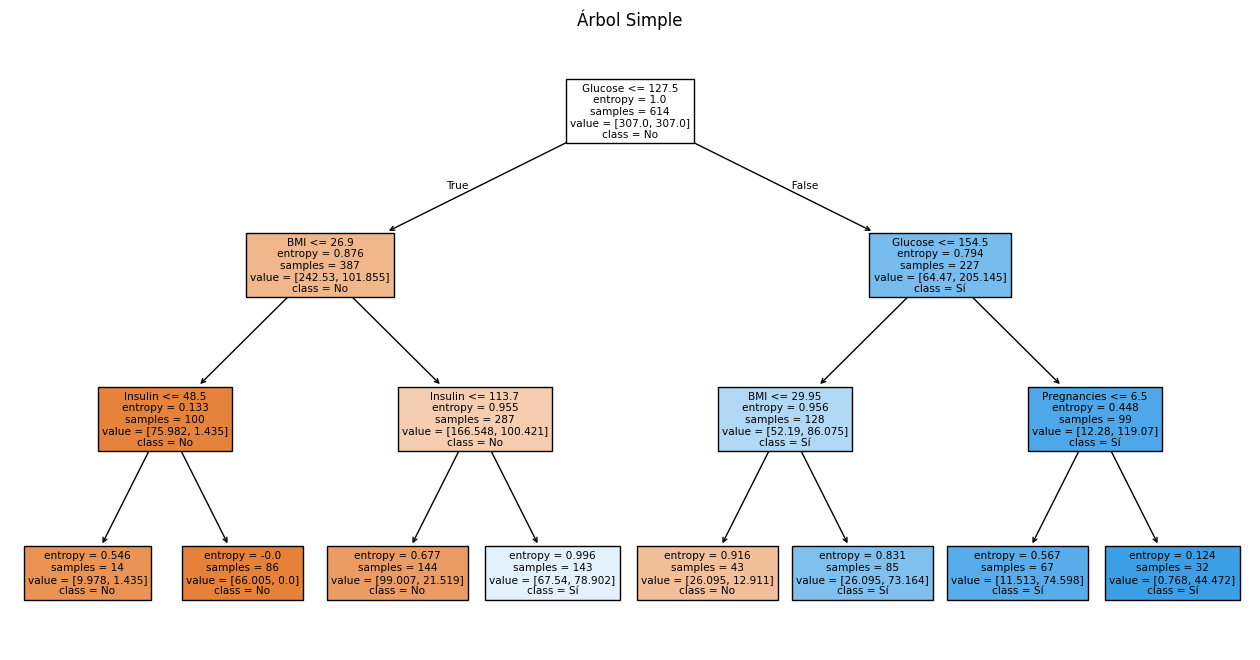

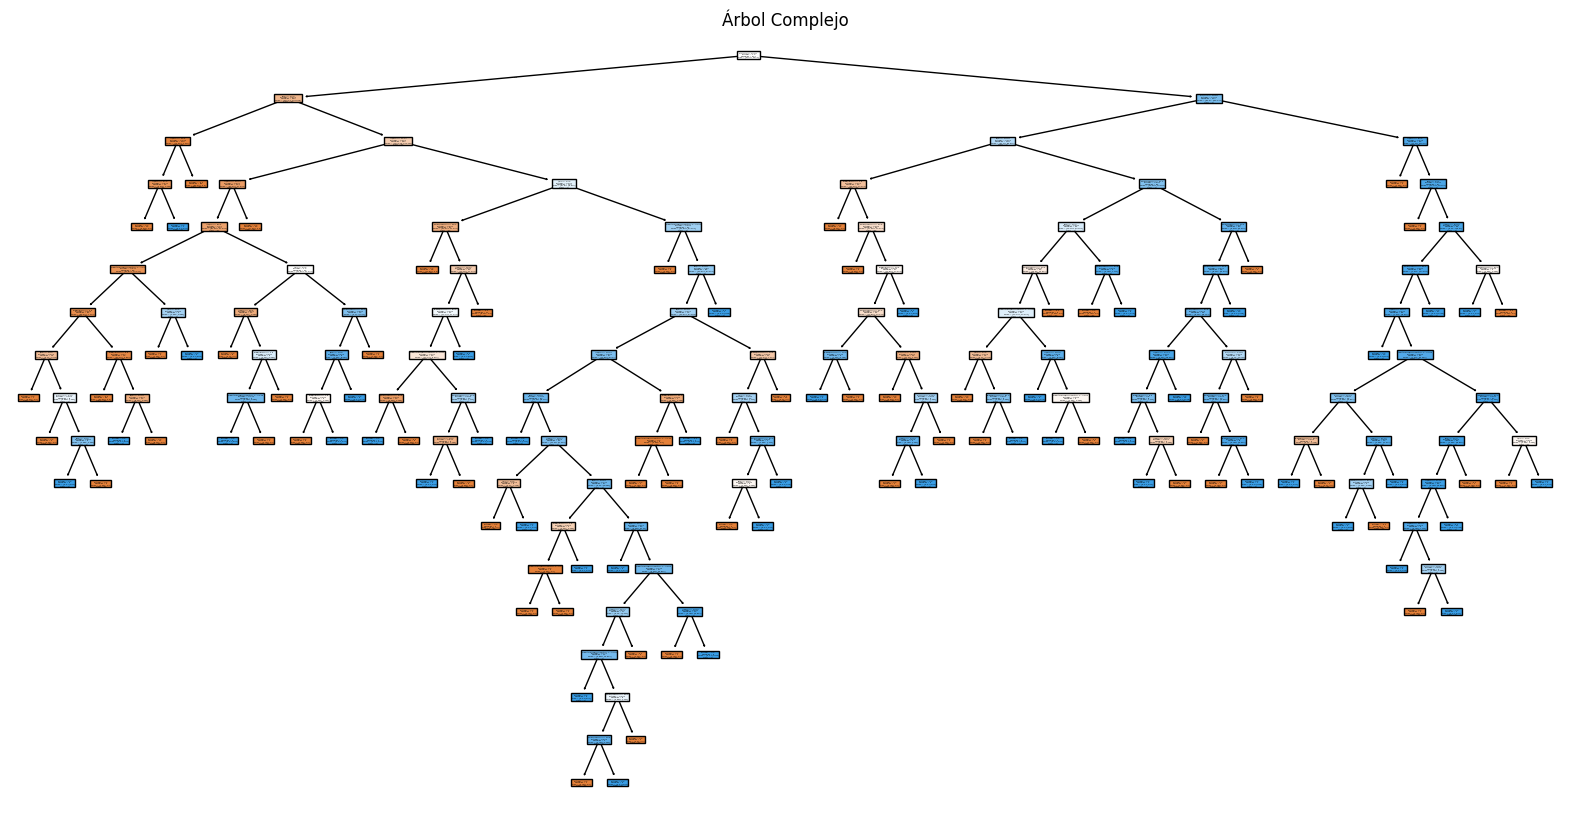

In [93]:
# Visualización de los árboles
# 1. Árbol simple
plt.figure(figsize=(16, 8))
plot_tree(arbol_simple, filled=True, feature_names=X.columns, class_names=["No", "Sí"])
plt.title("Árbol Simple")
plt.show()

# 2. Árbol complejo
plt.figure(figsize=(20, 10))
plot_tree(arbol_complejo, filled=True, feature_names=X.columns, class_names=["No", "Sí"])
plt.title("Árbol Complejo")
plt.show()

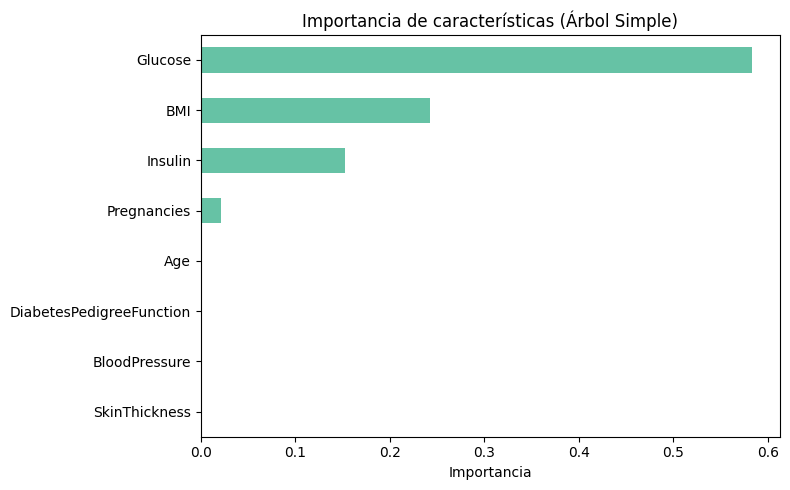

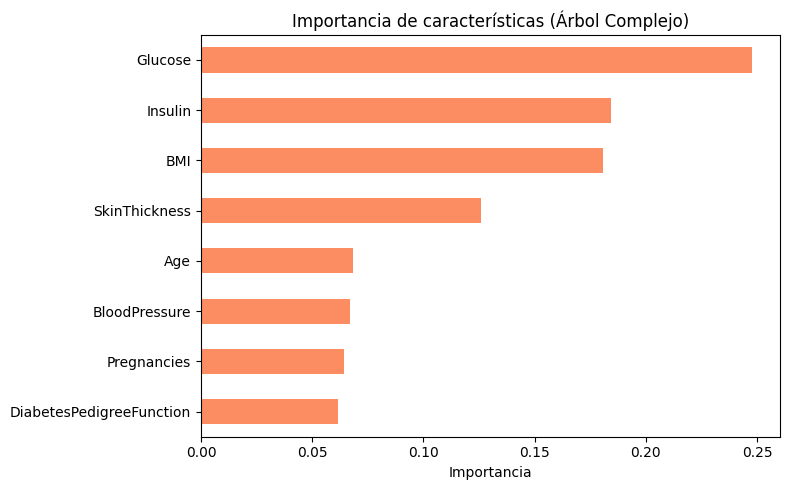

In [94]:
# Revisar la importancia de características: árbol simple y árbol complejo
# Árbol simple
importancia_simple = pd.Series(arbol_simple.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8, 5))
importancia_simple.plot(kind='barh', color='#66c2a5')
plt.title('Importancia de características (Árbol Simple)')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

# Árbol complejo
importancia_complejo = pd.Series(arbol_complejo.feature_importances_, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(8, 5))
importancia_complejo.plot(kind='barh', color='#fc8d62')
plt.title('Importancia de características (Árbol Complejo)')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()

Como vemos, el árbol simple prioriza sólo unas pocas variables ya que está restringido en profundidad. Por su parte, el árbol complejo explora todas las variables disponibles.
Así, mismo, es evidente que para ambos casos, Glucose, Insulin y BMI (índice de masa corporal) aparecen como las medidas más asociadas a la diabetes.

# Optimizar modelo

In [95]:
# Búsqueda de hiperparámetros con GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'class_weight': ['balanced']
}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='recall',  # Esto da más prioridad a detectar la clase positiva
    cv=5,
    n_jobs=-1
)

grid.fit(X_train, y_train)

print('Mejor combinación de hiperparámetros:', grid.best_params_)
print('Mejor resultado de validación cruzada (recall):', grid.best_score_)

Mejor combinación de hiperparámetros: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Mejor resultado de validación cruzada (recall): 0.8270210409745294


Reporte del modelo optimizado:

              precision    recall  f1-score   support

         0.0       0.87      0.62      0.73       100
         1.0       0.54      0.83      0.66        54

    accuracy                           0.69       154
   macro avg       0.71      0.73      0.69       154
weighted avg       0.76      0.69      0.70       154



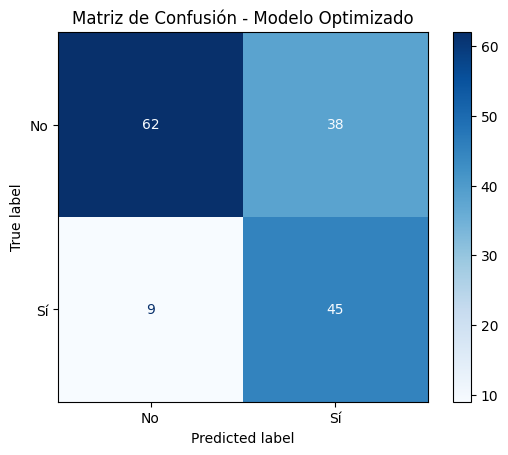

In [96]:
# Evaluar modelo
mejor_modelo = grid.best_estimator_
y_pred_opt = mejor_modelo.predict(X_test)

print('Reporte del modelo optimizado:\n')
print(classification_report(y_test, y_pred_opt))

ConfusionMatrixDisplay.from_estimator(mejor_modelo, X_test, y_test, display_labels=['No', 'Sí'], cmap='Blues')
plt.title('Matriz de Confusión - Modelo Optimizado')
plt.show()

# Guardar modelo

In [97]:
joblib.dump(mejor_modelo, "modelo_arbol_optimo.pkl")

['modelo_arbol_optimo.pkl']